In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#导入数据
player_info = pd.read_csv("data/player_info.csv")
player_behavior = pd.read_csv("data/player_behavior.csv")
purchase_data = pd.read_csv("data/purchase_data.csv")

In [4]:
#查看数据结构
print(player_info.head())
print(player_behavior.head())
print(purchase_data.head())
print(player_info.info())
print(player_behavior.info())
print(purchase_data.info())

   player_id        注册日期        渠道     设备类型 国家/地区
0          1  2023-04-13      FB广告  Android    巴西
1          2  2024-03-11    应用商店推荐      iOS    中国
2          3  2023-09-28    应用商店推荐  Android    美国
3          4  2023-04-17       跨推广  Android   加拿大
4          5  2023-03-13  Google广告  Android    韩国
   player_id  活跃天数  平均每日时长(min)  完成任务数  PVP次数  等级
0          1    21           56    198      2  34
1          2    42           75    104     33  16
2          3     5          126    199     21  33
3          4    52           64     76     42  32
4          5    11           92    171     21  40
   player_id      首次付费日期   累计付费金额  付费次数      最近一次付费 购买道具类型
0          1  2023-05-01    35.78     2  2023-06-03     月卡
1          2  2024-03-25   528.12     2  2024-05-06    钻石包
2          3  2023-10-18   683.49     4  2023-11-25   皮肤礼包
3          4         NaN     0.00     0         NaN    NaN
4          5  2023-04-10  1449.27     7  2023-04-28    钻石包
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [5]:
#检查缺失值
print(player_info.isna().sum())
print(player_behavior.isna().sum())

player_id    0
注册日期         0
渠道           0
设备类型         0
国家/地区        0
dtype: int64
player_id      0
活跃天数           0
平均每日时长(min)    0
完成任务数          0
PVP次数          0
等级             0
dtype: int64


In [6]:
#二.数据清洗预处理（这个环节主要依靠对业务数据的深度了解 -从而确定缺失值的处理方法和异常值的判断处理方法）

In [7]:
#对于付费表的缺失值：先判断是否是正常的业务缺失，是--代码处理填充分析；否---反馈采集。

#某些缺失值选择直接删除--如无注册日期
player_info.dropna(subset=['注册日期'], inplace=True)

#首先将三个表中日期列的格式都转变为日期格式,顺便将不是日期的数据/空值 都显示为NAT
player_info['注册日期']= pd.to_datetime(player_info['注册日期'])
purchase_data['首次付费日期'] = pd.to_datetime(purchase_data['首次付费日期'], errors='coerce')  
purchase_data['最近一次付费'] = pd.to_datetime(purchase_data['最近一次付费'], errors='coerce')

#某些缺失值选择填充-如付费金额
purchase_data['累计付费金额'] = purchase_data['累计付费金额'].fillna(0)

#某些缺失值选择填充字符串---如购买道具类型
purchase_data['购买道具类型'] = purchase_data['购买道具类型'].fillna("未购买")

In [8]:
print(purchase_data.info()) #检查清理结果

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   player_id  50000 non-null  int64         
 1   首次付费日期     17544 non-null  datetime64[ns]
 2   累计付费金额     50000 non-null  float64       
 3   付费次数       50000 non-null  int64         
 4   最近一次付费     17544 non-null  datetime64[ns]
 5   购买道具类型     50000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 2.3+ MB
None


#处理异常值（根据业务经验/数据分布）
1.一般来说先用 .describe() 看数值列的均值、分位数、最大值，快速发现离群值；
2.对日期列检查最小值和最大值，以及逻辑关系（注册 < 首次付费 < 最近一次付费）；
3.对类别列用 .value_counts() 看字符串列是否有奇怪类别或拼写错误。

In [9]:
print(player_behavior['活跃天数'].describe())
print(purchase_data['首次付费日期'].min() )
print(purchase_data['最近一次付费'].max() )
print(player_info['国家/地区'].value_counts())
# 检查是否有平均每日时长 > 1440 分钟
print(player_behavior[player_behavior['平均每日时长(min)'] > 1440])
# 检查是否有累计付费金额 < 0
print(purchase_data[purchase_data['累计付费金额'] < 0])

count    50000.000000
mean        30.632480
std         17.315324
min          1.000000
25%         16.000000
50%         31.000000
75%         46.000000
max         60.000000
Name: 活跃天数, dtype: float64
2023-01-01 00:00:00
2025-03-25 00:00:00
国家/地区
美国     6417
加拿大    6378
日本     6269
德国     6258
韩国     6226
中国     6191
巴西     6143
英国     6118
Name: count, dtype: int64
Empty DataFrame
Columns: [player_id, 活跃天数, 平均每日时长(min), 完成任务数, PVP次数, 等级]
Index: []
Empty DataFrame
Columns: [player_id, 首次付费日期, 累计付费金额, 付费次数, 最近一次付费, 购买道具类型]
Index: []


In [10]:
# 在处理完缺失值和异常值后去重
player_info = player_info.drop_duplicates(subset=["player_id"])
player_behavior = player_behavior.drop_duplicates(subset=["player_id"])
purchase_data = purchase_data.drop_duplicates(subset=["player_id"])

In [11]:
# 合并三表数据
game_player=player_info.merge(player_behavior, on='player_id')\
                     .merge(purchase_data, on='player_id')

三 .EDA探索性数据分析
（一）、用户画像分析：注册用户数、渠道占比
（二）、用户行为分析：DAU/MAU 、活跃度分层
（三）、付费分析：付费率、ARPU

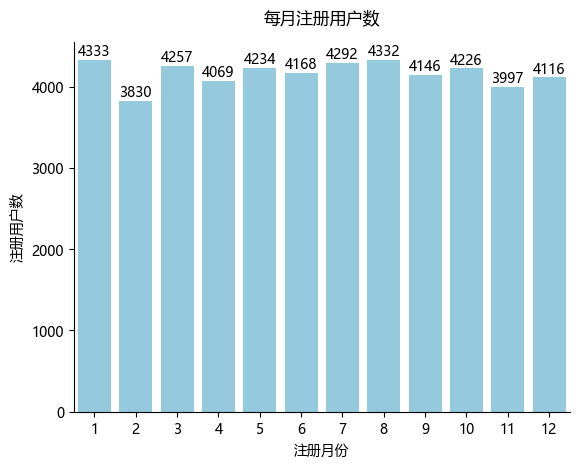

<Figure size 640x480 with 0 Axes>

In [12]:
#1.注册用户数
#创建新列以月为单位
game_player['注册月份'] = game_player['注册日期'].dt.month 

#计算每个月份的新增注册人数 
sign_in_month=game_player.groupby('注册月份')['player_id'].nunique()

#作图可视化
#需要显示中文得用到matplotlib中的一个功能font_manager去临时指定一个支持中文的字体
from matplotlib import rcParams 

# 将字体设置为中文 微软雅黑Microsoft YaHei
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  

df_sign_in = sign_in_month.reset_index()   # 转成 DataFrame
df_sign_in.columns = ['注册月份', '注册用户数']  # 改列名方便传递引用

ax1=sns.barplot(data=df_sign_in, x='注册月份', y='注册用户数', color='skyblue')
sns.despine()  # 去掉上、右边框

# 给每个数据柱添加数据标签
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
    
plt.title('每月注册用户数', y=1.03)
plt.show()
plt.savefig('D:/Epan/Dataanalysis/注册趋势.png') #保存结果图片

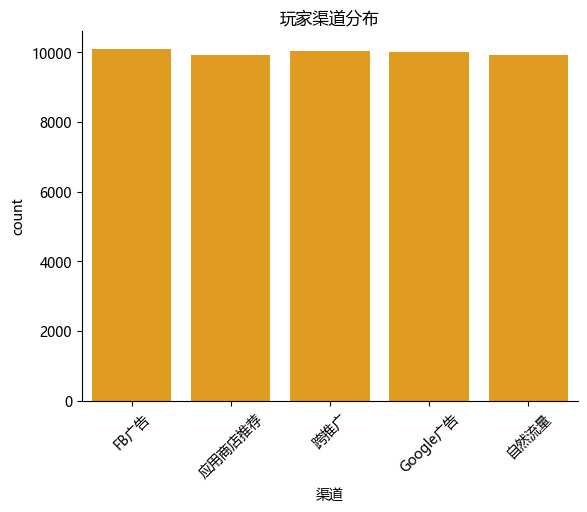

In [13]:
# 2.渠道占比（后如果继续有需求, 可结合投放成本计算 ROI)
sns.countplot(data=game_player, x='渠道',color='orange')
sns.despine() 
plt.title('玩家渠道分布')
plt.xticks(rotation=45)
plt.show()

(二） 用户行为分析--活跃度分析 （用户活跃度分层 以及各分层的行为均值的指标 ) 

In [15]:
#用户活跃度分层
def active(d):   #定义一个分类函数
    if pd.isna(d): return '未知'
    if d == 0: return '0天'
    if d <= 3: return '1-3天'
    if d <= 7: return '4-7天'
    if d <= 14: return '8-14天'
    return '15天+'

#将上面新建函数应用到表中活跃天数列 ,进而创建新的活跃度分层列
game_player['活跃强度分层'] = game_player['活跃天数'].apply(active)

#求每层人数和占比
active_dist = (game_player
    .groupby('活跃强度分层')['player_id'].nunique()  #按活跃强度分组计算每层的玩家人数
    .reset_index(name='人数')                  #保留Series两列结果转成df，给上一段代码的结果列命名'人数'
    .sort_values('人数', ascending=False))     #以'人数'列结果倒叙排列

#新建占比列
active_dist['占比'] = (active_dist['人数'] / active_dist['人数'].sum()).round(4)
active_dist


,活跃强度分层,人数,占比
1,15天+,38498,0.7700
3,8-14天,5696,0.1139
2,4-7天,3337,0.0667
0,1-3天,2469,0.0494


In [21]:
#如果需要固定分层顺序
order = ['0天','1-3天','4-7天','8-14天','15天+','未知']
game_player['活跃强度分层'] = pd.Categorical(game_player['活跃强度分层'], order, ordered=True)

#各分层的指标均值
act_cols = ['平均每日时长(min)', '完成任务数', 'PVP次数', '等级']
active_profile = (game_player
    .groupby('活跃强度分层', observed=True)[act_cols].mean()  #对活跃强度每层分组 计算每层玩家各指标的平均值
    .round(2)
    .reset_index()      #将分组键还原成普通列,并转成df
    .sort_values('活跃强度分层'))  #根据分层列排序
active_profile

,活跃强度分层,平均每日时长(min),完成任务数,PVP次数,等级
0,1-3天,94.42,101.38,24.46,24.60
1,4-7天,96.58,100.00,24.34,24.94
2,8-14天,94.16,100.04,24.53,24.95
3,15天+,94.69,99.69,24.45,25.04


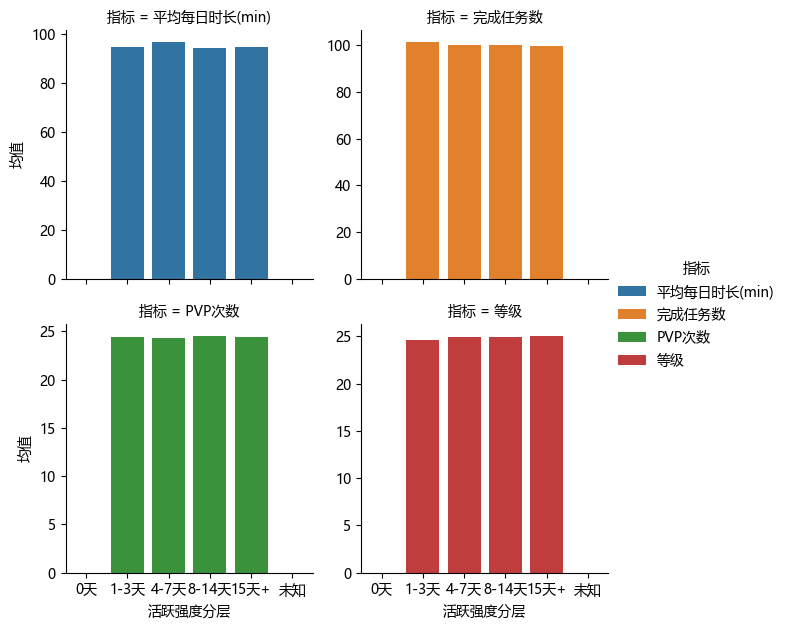

In [23]:
# 可视化---先将数据宽格式转为长格式long format,再用catplot分类作图

#设置长表分组标签为活跃强度，各指标'索引'列名为'指标', 第二列值列名为'均值' 
long_active = active_profile.melt(id_vars='活跃强度分层', value_vars=act_cols, var_name='指标', value_name='均值')

#作图--水平每行2个呈现各个指标的子图
sns.catplot(data=long_active, x='活跃强度分层', y='均值', col='指标',
            kind='bar', hue='指标',col_wrap=2, height=3.2, sharey=False)   #y轴刻度自动调整
plt.show()

(三） 付费分析--付费率、ARPU/ARPPU 及结果总结显示

In [32]:
# 付费率 
pay_player=game_player.loc[game_player['付费次数'] >= 1, 'player_id'].nunique() #会筛出付费的玩家 id  .nunique() 去重统计，得到付费用户数
total_player =game_player['player_id'].nunique()   #总用户数
付费率  = pay_player / total_player if total_player else 0  #if total_users else 0 是为了防止分母为 0 报错（数据为空时返回 0）

#ARPU 玩家平均付费金额
total_pay = game_player['累计付费金额'].sum()
ARPU  = total_pay / total_player if total_player else 0

#ARPPU（平均每位付费玩家的付费金额）=总付费金额/总的付费玩家数
ARPPU  = total_pay / pay_player if pay_player else 0


749.243093365253

In [33]:
kpi_df = pd.DataFrame([{
    '总用户数': total_player,
    '付费用户数': pay_player,
    '付费率': round(付费率, 4),
    '总收入': round(total_pay, 2),
    'ARPU': round(ARPU, 2),
    'ARPPU': round(ARPPU, 2),
}])
print(kpi_df)

    总用户数  付费用户数     付费率          总收入    ARPU   ARPPU
0  50000  17544  0.3509  13144720.83  262.89  749.24


(四) 渠道质量分析---各渠道总收入、玩家数、付费率/各渠道ARPU 及可视化

In [39]:
#创建定义一个按渠道分组计算各个指标的量函数
def channel_quality(df):     
    g = df.groupby('渠道')
    total_users = g['player_id'].nunique()   #每个渠道的玩家数
    pay_users   = g.apply(lambda x: x.loc[x['付费次数'] >= 1, 'player_id'].nunique(), include_groups=False)   #每个渠道的付费玩家数
    revenue     = g['累计付费金额'].sum()    #每个渠道的全部付费金额

    out = pd.DataFrame({
        '玩家数': total_users,
        '付费玩家数': pay_users,
        '付费率':  np.where(total_users > 0, pay_users / total_users, 0), #如果分母 > 0，就做除法，否则返回 0。
        '总收入': revenue
    })
    out['ARPU']  = (out['总收入'] / out['玩家数']).round(2)
    out['付费率'] = out['付费率'].round(4)
    out = out.reset_index().sort_values('总收入', ascending=False) #将分组的标签'渠道'恢复成普通列，并按每个渠道的总收入倒序排列
    return out

#将函数应用到本数据表中
channel_df = channel_quality(game_player)
print(channel_df.head(10))   

         渠道    玩家数  付费玩家数     付费率         总收入    ARPU
4       跨推广  10051   3503  0.3485  2657889.63  264.44
0      FB广告  10108   3546  0.3508  2647775.24  261.95
2    应用商店推荐   9917   3514  0.3543  2640133.70  266.22
3      自然流量   9916   3479  0.3508  2638839.02  266.12
1  Google广告  10008   3502  0.3499  2560083.24  255.80


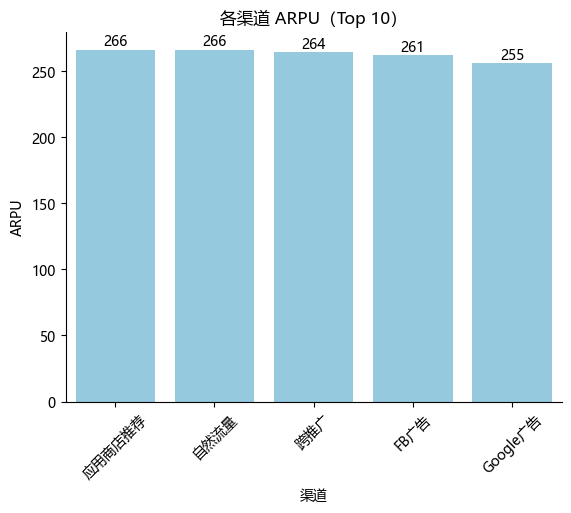

In [46]:
# 可视化：对各个渠道的 ARPU 玩家平均付费金额进行排序---探究渠道与付费的关系
top_c = channel_df.sort_values('ARPU', ascending=False).head(10)  #前十名渠道

p = sns.barplot(data=top_c, x='渠道', y='ARPU', color='skyblue')
sns.despine()  

for container in p.containers:    # 给每个数据柱添加数据标签
    p.bar_label(container, fmt='%d')
    
plt.title('各渠道 ARPU（Top 10）')
plt.xticks(rotation=45)
plt.show()

(五）LTV用户生命周期分析
1.按“注册月份”计算首充延迟 ≤ N 天(即该月注册过了多少天后第一次充值)的首付率
2.充值vs未充值玩家的活跃天数比较

In [50]:
# 首充延迟
game_player['首充延迟']= np.where( 
    game_player['首次付费日期'].notna() & game_player['注册日期'].notna(),
    (game_player['首次付费日期'] - game_player['注册日期']).dt.days,
    np.nan
) #如果两日期列都不是空值的话, 就进行减法计算，不然就返回NAN。
game_player.head(10)

,player_id,注册日期,渠道,设备类型,国家/地区,活跃天数,平均每日时长(min),完成任务数,PVP次数,等级,首次付费日期,累计付费金额,付费次数,最近一次付费,购买道具类型,注册月份,活跃强度分层,首充延迟,首充延迟(天)
0,1,2023-04-13,FB广告,Android,巴西,21,56,198,2,34,2023-05-01,35.78,2,2023-06-03,月卡,4,15天+,18.0,18.0
1,2,2024-03-11,应用商店推荐,iOS,中国,42,75,104,33,16,2024-03-25,528.12,2,2024-05-06,钻石包,3,15天+,14.0,14.0
2,3,2023-09-28,应用商店推荐,Android,美国,5,126,199,21,33,2023-10-18,683.49,4,2023-11-25,皮肤礼包,9,4-7天,20.0,20.0
3,4,2023-04-17,跨推广,Android,加拿大,52,64,76,42,32,NaT,0.00,0,NaT,未购买,4,15天+,NaN,NaN
4,5,2023-03-13,Google广告,Android,韩国,11,92,171,21,40,2023-04-10,1449.27,7,2023-04-28,钻石包,3,8-14天,28.0,28.0
5,6,2024-12-01,跨推广,iOS,加拿大,60,127,50,31,10,NaT,0.00,0,NaT,未购买,12,15天+,NaN,NaN
6,7,2023-01-21,FB广告,Android,巴西,5,151,40,46,1,2023-02-16,166.20,1,2023-03-31,钻石包,1,4-7天,26.0,26.0
7,8,2024-09-06,跨推广,Android,中国,16,44,176,25,35,NaT,0.00,0,NaT,未购买,9,15天+,NaN,NaN
8,9,2023-05-02,Google广告,Android,英国,12,66,39,17,32,2023-05-09,677.01,3,2023-05-11,武器礼包,5,8-14天,7.0,7.0
9,10,2024-04-11,应用商店推荐,Android,中国,37,166,142,13,27,2024-04-22,158.18,3,2024-05-14,月卡,4,15天+,11.0,11.0


In [54]:
#创建定义一个函数--首充延迟天数
def first_pay_days(df, d):
    e = (df['首充延迟'].notna()) & (df['首充延迟'] <= d)        # e表示满足 首充记录且 在注册日期后的几天内 条件的布尔Series
    f = df[e].groupby('注册月份')['player_id'].nunique()    #计算每月注册的满足<=几天内就有充值记录的玩家数
    g = df.groupby('注册月份')['player_id'].nunique()       #计算每月注册的所有玩家数
    rate = (f / g).fillna(0).round(4)                  #计算 <=N天内的首充率
    return rate.rename(f'≤{d}天首充率')          #重命名为了后面的合并区分

#计算得到包含['≤1天首充率','≤3天首充率','≤7天首充率','≤14天首充率','≤30天首充率']这些列的Series,并将它按列横向拼接组合成一个df
pay_speed = pd.concat([
    first_pay_days(game_player, 1),
    first_pay_days(game_player, 3),
    first_pay_days(game_player, 7),
    first_pay_days(game_player, 14),
    first_pay_days(game_player, 30),
], axis=1).reset_index()

display(pay_speed.head())

,注册月份,≤1天首充率,≤3天首充率,≤7天首充率,≤14天首充率,≤30天首充率
0,1,0.0252,0.0492,0.0939,0.1786,0.3515
1,2,0.0251,0.0460,0.1018,0.1786,0.3465
2,3,0.0242,0.0489,0.0940,0.1778,0.3467
3,4,0.0278,0.0482,0.0971,0.1735,0.3495
4,5,0.0208,0.0449,0.0897,0.1689,0.3375


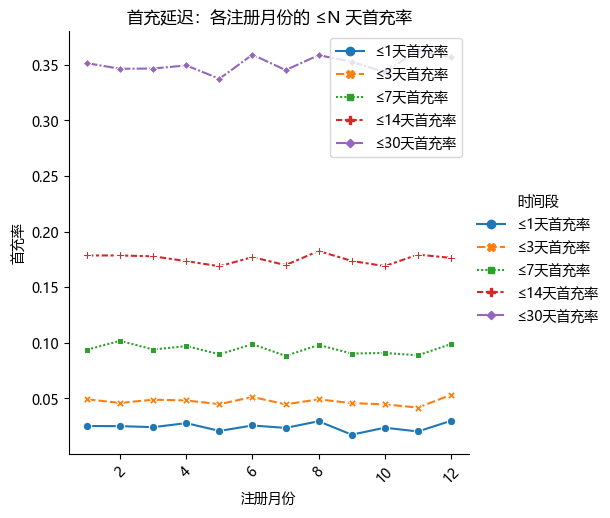

In [57]:
#可视化首充率
#为了做图方便,转换成long format
pay_speed_long = pay_speed.melt(id_vars='注册月份', var_name='时间段', value_name='首充率' )

sns.relplot(data=pay_speed_long, x='注册月份', y='首充率', kind='line', hue='时间段', style='时间段',markers=True)
plt.legend()
plt.title('首充延迟：各注册月份的 ≤N 天首充率')
plt.xticks(rotation=45)
plt.show()

In [58]:
# 付费 vs 非付费 的平均活跃天数 

## 先生成分组列
game_player['付费分组'] = np.where(game_player['付费次数']>=1, '付费用户', '非付费用户')

#再分组计算比较 付费vs未付费的活跃天数
life_cmp = (game_player.groupby('付费分组')['活跃天数']
    .agg(人数='count', 平均活跃天数='mean', 中位活跃天数='median')
    .round(2)
    .reset_index())
print(life_cmp)

,付费分组,人数,平均活跃天数,中位活跃天数
0,付费用户,17544,30.62,31.0
1,非付费用户,32456,30.64,31.0


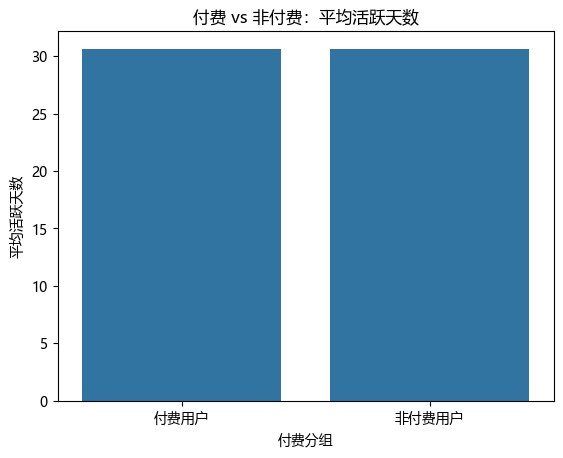

In [59]:
# 可视化
sns.barplot(data=life_cmp, x='付费分组', y='平均活跃天数')
plt.title('付费 vs 非付费：平均活跃天数')
plt.show()